In [23]:
from engines import SearchEngineOpenSearch
from crawler import WebCrawler
from graph import DomainGraph, PageRank
from document_processor import Preprocessor
from utils import extract_documents_from_crawled_data
from vector_space_model import VectorSpace
import json

In [5]:
LIMIT = 10
DEPTH = 1
EPSILON = 0.2

In [34]:
searcher = SearchEngineOpenSearch(limit=LIMIT)
crawler = WebCrawler(depth=DEPTH)
graph = DomainGraph()
pre_processor = Preprocessor()
vsm = VectorSpace()

In [7]:
query = input("Enter a query: ")
print("Searching for query : ", query)

Searching for query :  python


In [8]:
all_data, links = searcher.search(query)
crawled_data = [crawler.crawl(links)]

Crawling: https://www.python.org/ Depth: 0
Crawling: http://browsehappy.com/ Depth: 1
Skipping link (same domain): https://www.python.org/psf/
Crawling: https://docs.python.org Depth: 1
Skipping link (same domain): https://docs.python.org/3.14/
Skipping link (same domain): https://docs.python.org/3.13/
Skipping link (same domain): https://docs.python.org/3.12/
Skipping link (same domain): https://docs.python.org/3.11/
Skipping link (same domain): https://docs.python.org/3.10/
Skipping link (same domain): https://docs.python.org/3.9/
Skipping link (same domain): https://docs.python.org/3.8/
Skipping link (same domain): https://docs.python.org/3.7/
Skipping link (same domain): https://docs.python.org/3.6/
Skipping link (same domain): https://docs.python.org/3.5/
Skipping link (same domain): https://docs.python.org/3.4/
Skipping link (same domain): https://docs.python.org/3.3/
Skipping link (same domain): https://docs.python.org/3.2/
Skipping link (same domain): https://docs.python.org/3.

Graph for the query :  how to make pasta


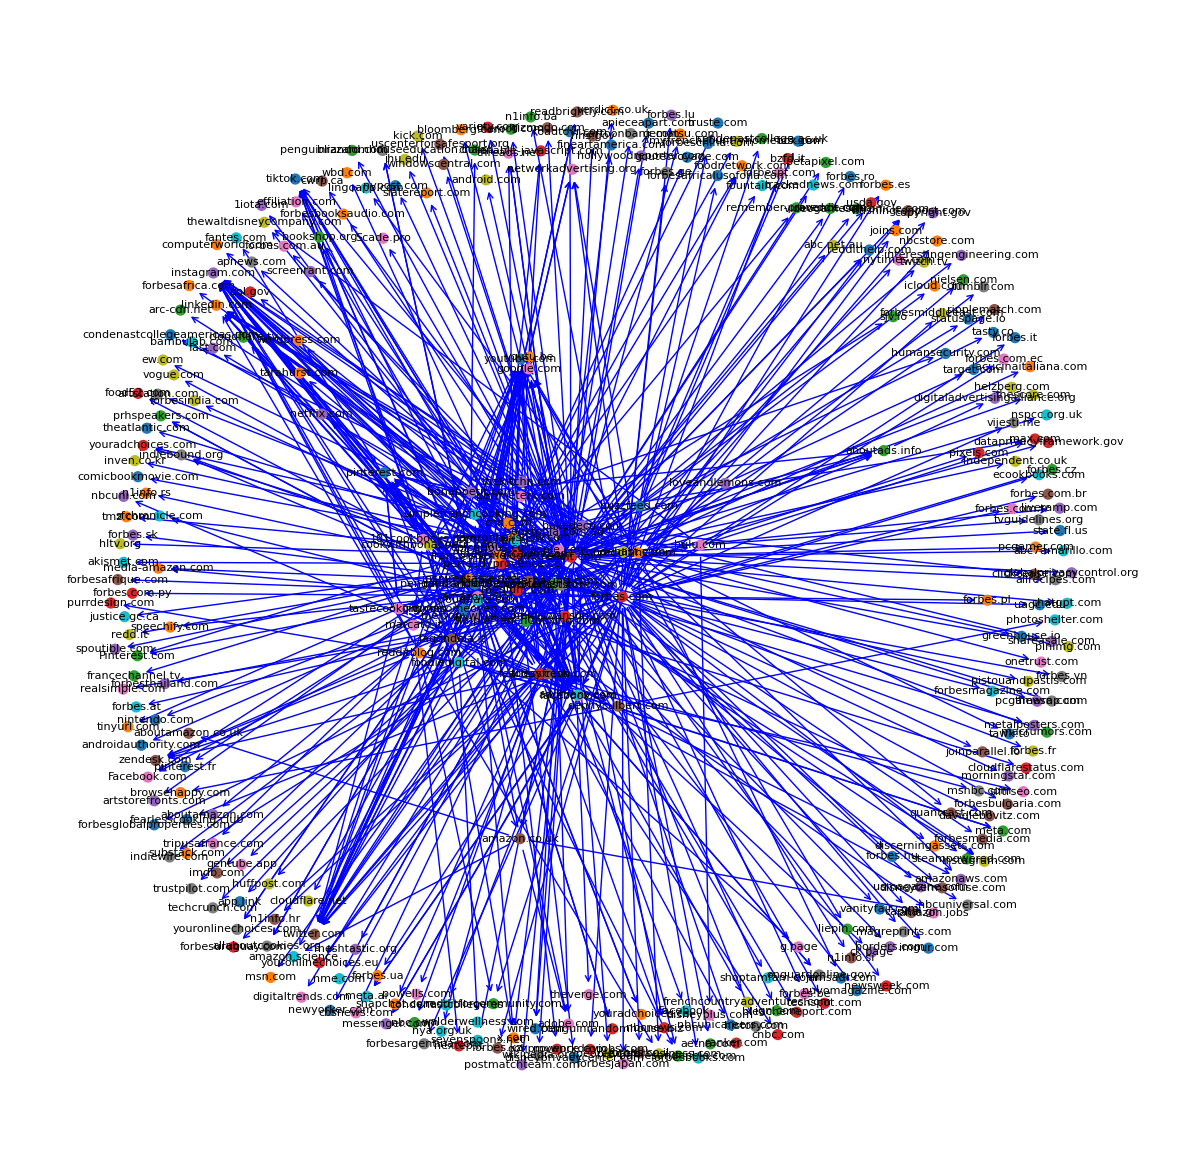

In [9]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

Graph for the query :  nuclear bomb


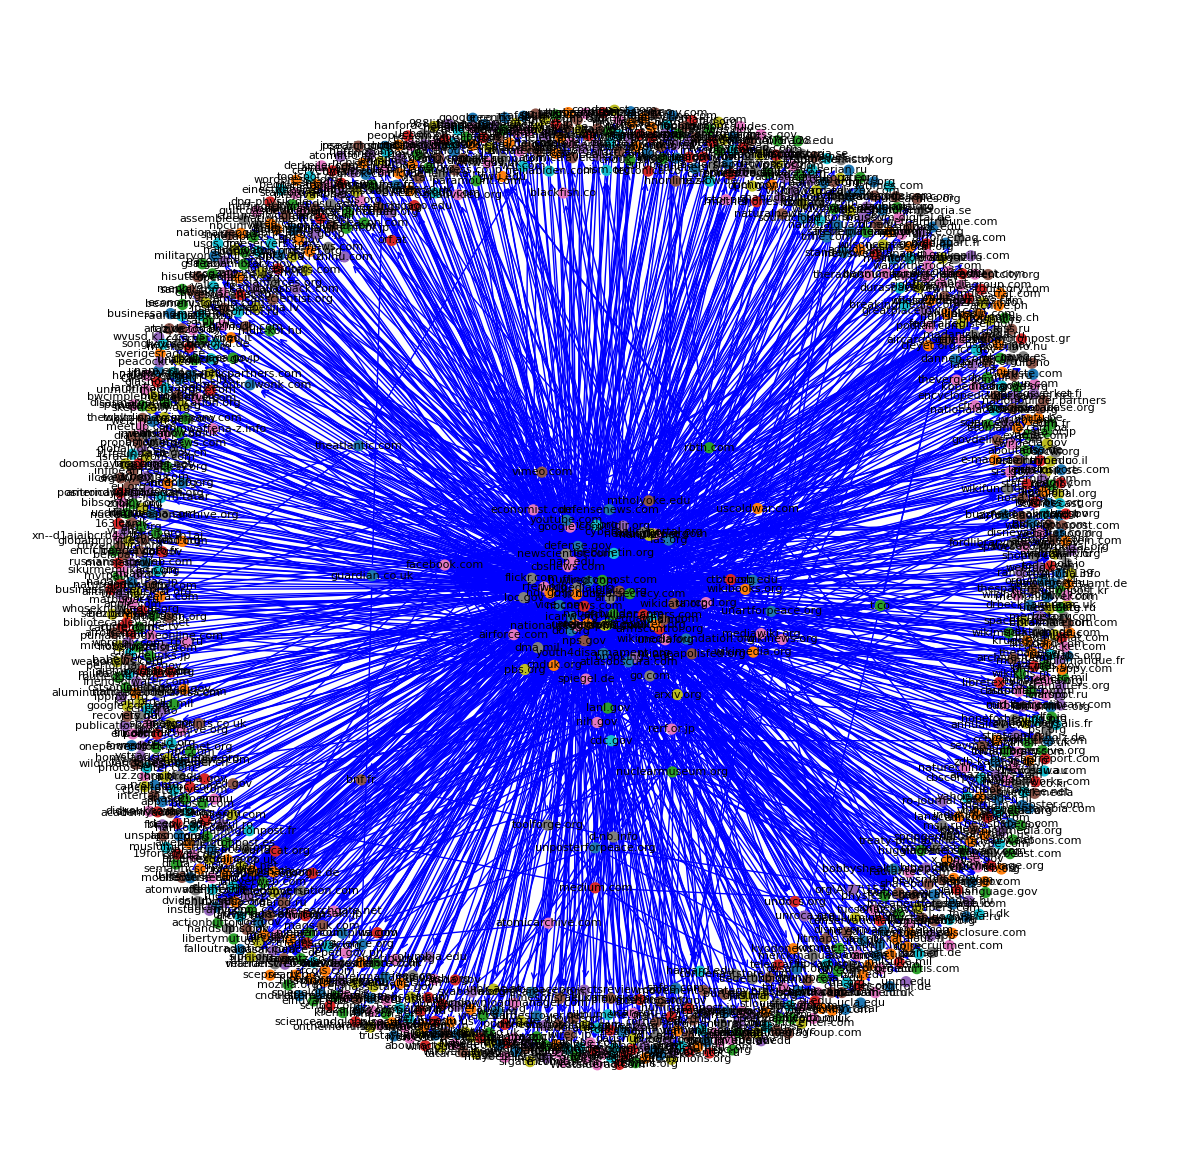

In [16]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

Graph for the query :  python


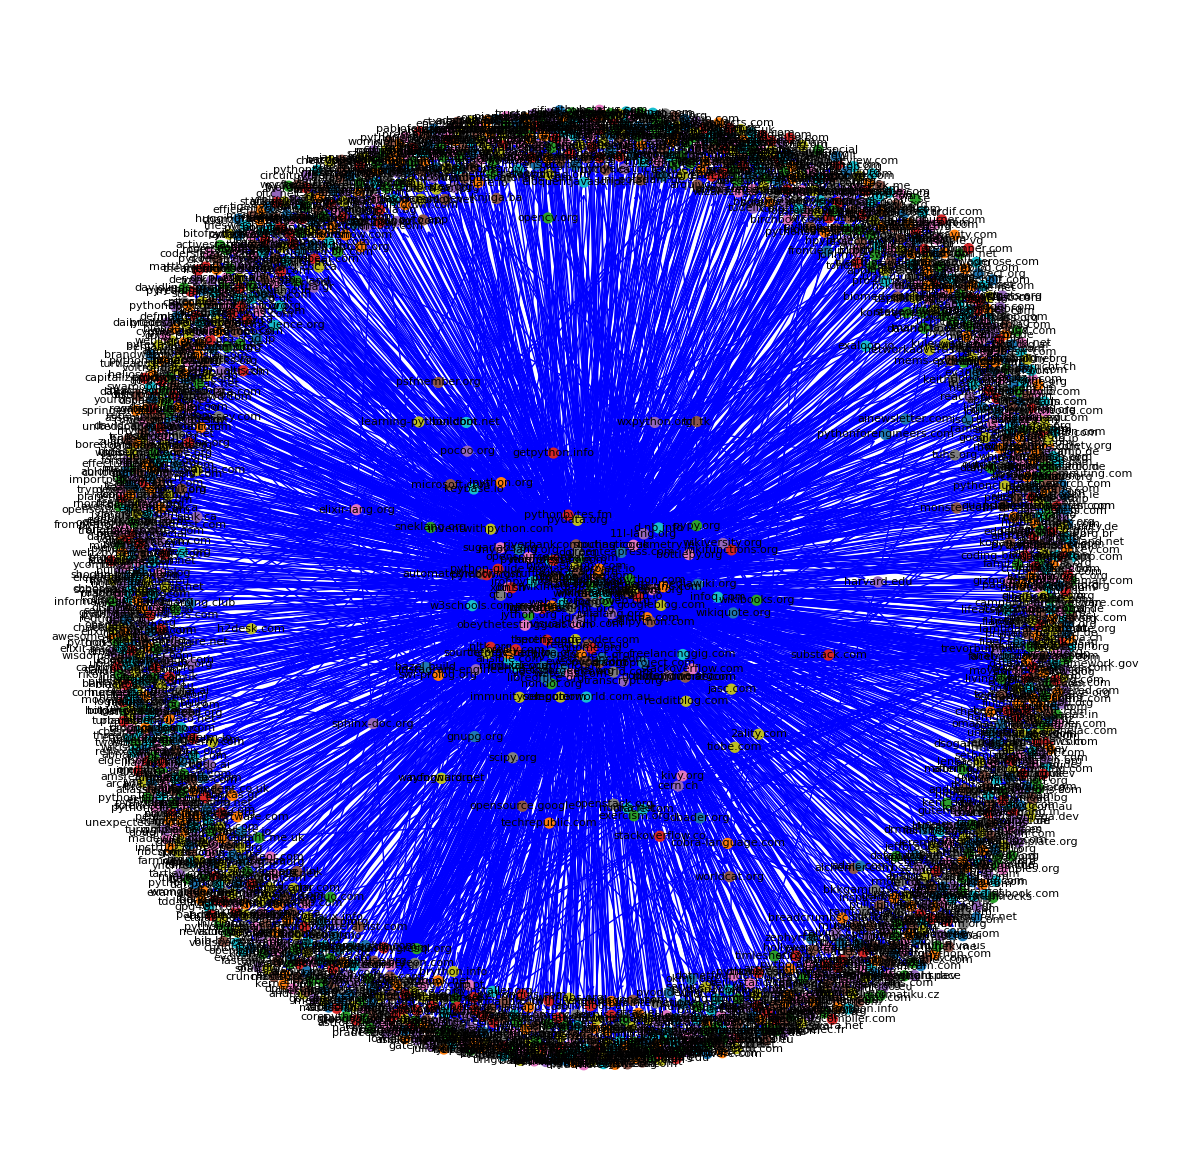

In [21]:
print("Graph for the query : ", query)
graph.draw_from_json(crawled_data)

In [10]:
page_rank = PageRank(graph.return_graph_matrix(), epsilon=EPSILON)
print("Graph Matrix : \n", graph.return_graph_matrix())

Graph Matrix : 
 [[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print("Normalized Graph Matrix : \n", page_rank.normalize_matrix())

Normalized Graph Matrix : 
 [[1.04986877e-04 8.00104987e-01 2.00104987e-01 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]
 [1.04986877e-04 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]
 [1.04986877e-04 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]
 ...
 [1.04986877e-04 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]
 [1.04986877e-04 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]
 [1.04986877e-04 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
  1.04986877e-04 1.04986877e-04]]


In [13]:
print("Page Rank : ", page_rank.get_pagerank())

Page Rank :  [1.15035134e-01 1.04986877e-04 1.04986877e-04 ... 1.04986877e-04
 1.04986877e-04 1.04986877e-04]


In [38]:
documents = extract_documents_from_crawled_data(crawled_data[0])
all_documents = {doc_id: pre_processor.preprocess(doc) for doc_id, doc in documents.items()}
pre_processed_query = pre_processor.preprocess(query)

In [ ]:
vsm.set_docs(all_documents)
vsm.search(pre_processed_query)

Top relevant documents:
{'welcom': {0: 1.0, 4: 1.0, 6: 1.0, 7: 1.3010299956639813}, 'pythonorg': {0: 1.0, 2: 1.4771212547196624, 4: 1.3010299956639813, 5: 2.462397997898956, 8: 1.3010299956639813}, 'notic': {0: 1.3010299956639813, 2: 1.3010299956639813}, 'javascript': {0: 1.3010299956639813, 1: 2.079181246047625, 2: 1.3010299956639813, 5: 1.9030899869919435}, 'essenti': {0: 1.0, 2: 1.0, 5: 1.0}, 'websit': {0: 1.4771212547196624, 1: 1.845098040014257, 2: 1.3010299956639813, 5: 1.4771212547196624}, 'interact': {0: 1.3010299956639813, 2: 1.0, 3: 1.6989700043360187, 5: 1.0, 7: 1.0}, 'content': {0: 1.4771212547196624, 1: 1.3010299956639813, 2: 1.3010299956639813, 4: 1.9030899869919435, 5: 1.7781512503836436, 6: 1.0, 7: 1.0, 8: 1.3010299956639813}, 'limit': {0: 1.0, 1: 1.3010299956639813, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.3010299956639813, 8: 2.0}, 'plea': {0: 1.0, 2: 1.0, 3: 1.0, 4: 1.9542425094393248, 6: 1.0, 7: 1.7781512503836436, 8: 1.4771212547196624}, 'turn': {0: 1.0, 2: 1.0, 4: 1.0}, 'full